In [1]:
import sys
sys.path.append('../../')

import numpy as np

from src.mechanism.crowdsourcing import Crowdsourcing
from src.game import Game
from src.strategy import Strategy

from src.learner.frank_wolfe import FrankWolfe
from src.learner.poga import POGA
from src.learner.soda import SODA

**Setting**
create specific Single Item Auction setting

In [2]:
# parameter mechanism
bidder = ['1']*5
o_space = {i:[0.0, 1.0] for i in bidder}
a_space = {i:[0.0, 0.75] for i in bidder}

param_prior = {'distribution':'uniform'}
param_util = {
    'tiebreaking':'lose', 
    'type':'valuation', 
    'prices': [0.7, 0.3]}

# parameter approximation game
n = 128
m = 128

# create mechanism
mechanism = Crowdsourcing(bidder, o_space, a_space, param_prior, param_util)

# create approximation game
game = Game(mechanism, n, m)

**Learner**
Specify Learning Algorithm

In [3]:
# parameter learner
max_iter = int(5e3)
tol = 1e-5
steprule_bool = True
eta = 10
beta = 1/20

learner = SODA(max_iter, tol, steprule_bool, eta, beta)
#learner = FrankWolfe(max_iter, tol)
#learner = POGA(max_iter, tol, steprule_bool, eta, beta)

Run Learning Algorithm

In [4]:
#create and initialize strategies
strategies = {}
for i in game.set_bidder:
    strategies[i] = Strategy(i, game)
    strategies[i].initialize('random')
    
# run soda
learner.run(mechanism, game, strategies)

100%|████████████████████| 5.00k/5.00k [00:04<00:00, 1.25kit/s]

No convergence
Current relative utility loss 0.026 %
Best relative utility loss 0.026 %


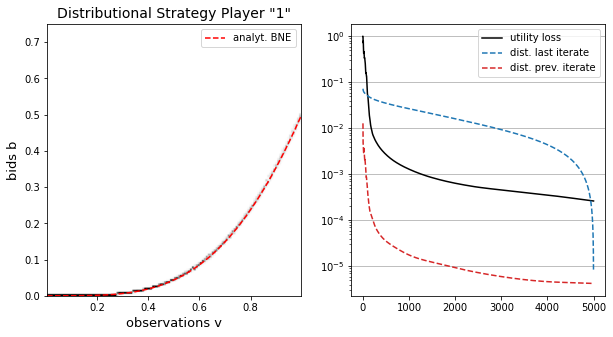

In [5]:
x = strategies['1'].o_discr
n_bidder = mechanism.n_bidder

beta = lambda x: param_util["prices"][0] * (n_bidder-1)/n_bidder*x**n_bidder\
               + param_util["prices"][1] * ((n_bidder-2)*x**(n_bidder-1) - (n_bidder-1)**2/n_bidder * x **n_bidder)
    
strategies['1'].plot(True, beta(x))